### **Prueba Final (Opción A)**


#  modelos de machine learning que se pueden utilizar para predecir si un paciente tiene o no cáncer de mama 
Supongamos que usted trabaja en el servicio de salud y recibe muestras que provienen de
mujeres con cáncer de mama.
Los médicos han extraído características y las han anotado, su trabajo es crear un modelo
que sea capaz de identificar si un paciente tiene o no cáncer.
Recordemos que un falso positivo no es tan preocupante como un falso negativo, ya que en
el futuro se le hacen más pruebas a las pacientes y hay oportunidades de descubrir que
estábamos en un error.
Sin embargo, un falso negativo puede llevar a que el cáncer se desarrolle sin supervisión
durante más tiempo del necesario y podría llevar a daños más graves o incluso la muerte de
la paciente.


# **Requerimientos:**

Teniendo esto en cuenta, desarrolla un modelo que funcione lo mejor posible y explica qué
decisiones has tomado en su elaboración y por que.
A entregar obligatoriamente:
- Link a un repositorio público de Github que contenga al menos:
- Un archivo Jupyter Notebook con todas las celdas ejecutadas en orden. Es decir,
que antes de subir el archivo a github habéis limpiado el notebook (Kernel restart
and clear output) y luego lo habéis ejecutado desde el principio).
- Un archivo Readme en el que se explica el proyecto y el ejercicio. Tened en cuenta
que este repositorio puede serviros como CV en el futuro y que los recruiters
suelen mirar los archivos Readme.md
- Una carpeta data con el dataset.
En el notebook debe aparecer el proceso de preprocesado de datos desde los archivos
originales a ser posible.
En el notebook debéis probar al menos con 3 modelos, evaluarlos y decidir cual es el mejor,
justificando la respuesta en base a las matrices de confusión que aparecen al evaluar el
error en training y en test.
El dataset y su descripción aparecen aquí:
https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

## **Razonamientos:**


Existen varios modelos de machine learning que se pueden utilizar para predecir si un paciente tiene o no cáncer de mama a partir de un conjunto de datos de muestras. A continuación se mencionan algunos de ellos:

Árboles de decisión: los árboles de decisión son modelos de clasificación que dividen los datos en ramas, tomando decisiones en cada nodo. Este modelo es útil cuando los datos son heterogéneos y tienen muchos atributos.

Regresión logística: la regresión logística es un modelo de clasificación que predice la probabilidad de que un paciente tenga cáncer de mama. Es útil cuando se tiene una gran cantidad de datos y cuando los datos tienen una distribución normal.

Support Vector Machines (SVM): las SVM son un modelo de clasificación que encuentra el mejor hiperplano que separa los datos. Es útil cuando se tiene un conjunto de datos linealmente separable.

Redes neuronales: las redes neuronales son modelos de aprendizaje profundo que se basan en la estructura del cerebro humano para clasificar los datos. Este modelo es útil cuando se tienen datos complejos y no lineales.

Cada modelo tiene sus ventajas y desventajas, y es importante evaluar su rendimiento en el conjunto de datos específico antes de decidir cuál utilizar. Además, es importante tener en cuenta que un solo modelo no puede proporcionar una predicción precisa en todos los casos, por lo que puede ser útil combinar varios modelos para mejorar la precisión de la predicción.

# **Inicio**

# Selección de herramienta

In [1]:
# para ejecutar con google colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Carga de librerías requeridas**

In [2]:
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [3]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns


# Configuración matplotlib
# ==============================================================================
plt.style.use('ggplot')

In [4]:
%matplotlib inline

# **Selección de Datos**

In [5]:
data = pd.read_csv("/content/drive/MyDrive/ML_predict_cancer/breast-cancer-wisconsin.data") #Se lee el archivo de datos, el mismo que se debe encontrar en el mismo directorio donde está el programa (ya que se indica como path "./")
print(data.shape) # mostrar cuantas filas y columnas se leyo en el archivo de datos a validar

(698, 11)


In [6]:
data

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4
...,...,...,...,...,...,...,...,...,...,...,...
693,776715,3,1,1,1,3,2,1,1,1,2
694,841769,2,1,1,1,2,1,1,1,1,2
695,888820,5,10,10,3,7,3,8,10,2,4
696,897471,4,8,6,4,3,4,10,6,1,4


In [49]:
data = pd.read_csv("/content/drive/MyDrive/ML_predict_cancer/wpbc.data") 
data

,119513,N,31,18.02,27.6,117.5,1013,0.09489,0.1036,0.1086,...,139.7,1436,0.1195,0.1926,0.314,0.117,0.2677,0.08113,5,5.1
0,8423,N,61,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,...,184.60,2019.0,0.16220,0.6656,0.7119,0.26540,0.4601,0.11890,3.0,2
1,842517,N,116,21.37,17.44,137.50,1373.0,0.08836,0.11890,0.12550,...,159.10,1949.0,0.11880,0.3449,0.3414,0.20320,0.4334,0.09067,2.5,0
2,843483,N,123,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,...,98.87,567.7,0.20980,0.8663,0.6869,0.25750,0.6638,0.17300,2.0,0
3,843584,R,27,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,...,152.20,1575.0,0.13740,0.2050,0.4000,0.16250,0.2364,0.07678,3.5,0
4,843786,R,77,12.75,15.29,84.60,502.7,0.11890,0.15690,0.16640,...,107.30,733.2,0.17060,0.4196,0.5999,0.17090,0.3485,0.11790,2.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,942640,N,10,22.52,21.92,146.90,1597.0,0.07592,0.09162,0.06862,...,162.10,1902.0,0.08191,0.1319,0.1056,0.09378,0.2061,0.05788,6.0,2
193,943471,N,8,15.44,31.18,101.00,740.4,0.09399,0.10620,0.13750,...,112.60,929.0,0.12720,0.2362,0.2975,0.12860,0.2914,0.08024,1.5,0
194,94547,N,12,17.17,29.19,110.00,915.3,0.08952,0.06655,0.06583,...,132.50,1295.0,0.12610,0.1572,0.2141,0.09520,0.3362,0.06033,3.7,0
195,947204,R,3,21.42,22.84,145.00,1440.0,0.10700,0.19390,0.23800,...,198.30,2375.0,0.14980,0.4379,0.5411,0.22150,0.2832,0.08981,3.0,?


In [70]:
data = pd.read_csv("/content/drive/MyDrive/ML_predict_cancer/wdbc.data") 
data

,842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,...,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.5355,0.1741,0.3985,0.12440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
564,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
565,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
566,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# **Manejo de Datos**

In [71]:
data.head(2) # muestra la cabecera y ciertas filas seleccionadas

,842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,...,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
0,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.186,0.2750,0.08902
1,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.243,0.3613,0.08758


In [72]:
data.describe(include ='all') # describe la cantidad de columnas e identifica si hay nulos

,842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,...,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
count,5.680000e+02,568,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,...,568.00000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3.042382e+07,NaN,14.120491,19.305335,91.914754,654.279754,0.096321,0.104036,0.088427,0.048746,...,16.25315,25.691919,107.125053,878.578873,0.132316,0.253541,0.271414,0.114341,0.289776,0.083884
std,1.251246e+08,NaN,3.523416,4.288506,24.285848,351.923751,0.014046,0.052355,0.079294,0.038617,...,4.82232,6.141662,33.474687,567.846267,0.022818,0.156523,0.207989,0.065484,0.061508,0.018017
min,8.670000e+03,NaN,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.93000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692225e+05,NaN,11.697500,16.177500,75.135000,420.175000,0.086290,0.064815,0.029540,0.020310,...,13.01000,21.095000,84.102500,514.975000,0.116600,0.146900,0.114475,0.064730,0.250350,0.071412
50%,9.061570e+05,NaN,13.355000,18.855000,86.210000,548.750000,0.095865,0.092525,0.061400,0.033455,...,14.96500,25.425000,97.655000,685.550000,0.131300,0.211850,0.226550,0.099840,0.282050,0.080015
75%,8.825022e+06,NaN,15.780000,21.802500,103.875000,782.625000,0.105300,0.130400,0.129650,0.073730,...,18.76750,29.757500,125.175000,1073.500000,0.146000,0.337600,0.381400,0.161325,0.317675,0.092065


In [45]:
#to_csv()
#data = pd.read_csv("/content/drive/MyDrive/ML_predict_cancer/wdbc.data") 
#data

In [73]:
data

,842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,...,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.5355,0.1741,0.3985,0.12440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
564,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
565,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
566,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 32 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   842302    568 non-null    int64  
 1   M         568 non-null    object 
 2   17.99     568 non-null    float64
 3   10.38     568 non-null    float64
 4   122.8     568 non-null    float64
 5   1001      568 non-null    float64
 6   0.1184    568 non-null    float64
 7   0.2776    568 non-null    float64
 8   0.3001    568 non-null    float64
 9   0.1471    568 non-null    float64
 10  0.2419    568 non-null    float64
 11  0.07871   568 non-null    float64
 12  1.095     568 non-null    float64
 13  0.9053    568 non-null    float64
 14  8.589     568 non-null    float64
 15  153.4     568 non-null    float64
 16  0.006399  568 non-null    float64
 17  0.04904   568 non-null    float64
 18  0.05373   568 non-null    float64
 19  0.01587   568 non-null    float64
 20  0.03003   568 non-null    float6

In [75]:
data.describe(include ='all') # describe la cantidad de columnas e identifica si hay nulos

,842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,...,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
count,5.680000e+02,568,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,...,568.00000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3.042382e+07,NaN,14.120491,19.305335,91.914754,654.279754,0.096321,0.104036,0.088427,0.048746,...,16.25315,25.691919,107.125053,878.578873,0.132316,0.253541,0.271414,0.114341,0.289776,0.083884
std,1.251246e+08,NaN,3.523416,4.288506,24.285848,351.923751,0.014046,0.052355,0.079294,0.038617,...,4.82232,6.141662,33.474687,567.846267,0.022818,0.156523,0.207989,0.065484,0.061508,0.018017
min,8.670000e+03,NaN,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.93000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692225e+05,NaN,11.697500,16.177500,75.135000,420.175000,0.086290,0.064815,0.029540,0.020310,...,13.01000,21.095000,84.102500,514.975000,0.116600,0.146900,0.114475,0.064730,0.250350,0.071412
50%,9.061570e+05,NaN,13.355000,18.855000,86.210000,548.750000,0.095865,0.092525,0.061400,0.033455,...,14.96500,25.425000,97.655000,685.550000,0.131300,0.211850,0.226550,0.099840,0.282050,0.080015
75%,8.825022e+06,NaN,15.780000,21.802500,103.875000,782.625000,0.105300,0.130400,0.129650,0.073730,...,18.76750,29.757500,125.175000,1073.500000,0.146000,0.337600,0.381400,0.161325,0.317675,0.092065


dato que existe campo " M "
Results:

	- predicting field 2, diagnosis: B = benign, M = malignant
	- sets are linearly separable using all 30 input features
	- best predictive accuracy obtained using one separating plane
		in the 3-D space of Worst Area, Worst Smoothness and
		Mean Texture.  Estimated accuracy 97.5% using repeated
		10-fold crossvalidations.  Classifier has correctly
		diagnosed 176 consecutive new patients as of November
		1995. 

In [76]:
print(data.groupby('M').size()) # agrupamos los datos según el campo "M" y se cuenta los datos en cada grupo
print(data.shape)
#print(pd.value_counts(data['M'], sort = True))

M
B    357
M    211
dtype: int64
(568, 32)


In [77]:
print(data)

       842302  M  17.99  10.38   122.8    1001   0.1184   0.2776   0.3001  \
0      842517  M  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.08690   
1    84300903  M  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.19740   
2    84348301  M  11.42  20.38   77.58   386.1  0.14250  0.28390  0.24140   
3    84358402  M  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.19800   
4      843786  M  12.45  15.70   82.57   477.1  0.12780  0.17000  0.15780   
..        ... ..    ...    ...     ...     ...      ...      ...      ...   
563    926424  M  21.56  22.39  142.00  1479.0  0.11100  0.11590  0.24390   
564    926682  M  20.13  28.25  131.20  1261.0  0.09780  0.10340  0.14400   
565    926954  M  16.60  28.08  108.30   858.1  0.08455  0.10230  0.09251   
566    927241  M  20.60  29.33  140.10  1265.0  0.11780  0.27700  0.35140   
567     92751  B   7.76  24.54   47.92   181.0  0.05263  0.04362  0.00000   

      0.1471  ...   25.38  17.33   184.6    2019   0.1622   0.6656  0.7119 

In [78]:
#Cambio el formato o creo otra columna a numérico
data["diagnosis"]=data["M"].apply(lambda x:1 if x=='B' else 0)
data

,842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,...,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189,diagnosis
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.17910,0.52490,0.5355,0.1741,0.3985,0.12440,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
564,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
565,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
566,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [79]:
print(data)

       842302  M  17.99  10.38   122.8    1001   0.1184   0.2776   0.3001  \
0      842517  M  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.08690   
1    84300903  M  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.19740   
2    84348301  M  11.42  20.38   77.58   386.1  0.14250  0.28390  0.24140   
3    84358402  M  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.19800   
4      843786  M  12.45  15.70   82.57   477.1  0.12780  0.17000  0.15780   
..        ... ..    ...    ...     ...     ...      ...      ...      ...   
563    926424  M  21.56  22.39  142.00  1479.0  0.11100  0.11590  0.24390   
564    926682  M  20.13  28.25  131.20  1261.0  0.09780  0.10340  0.14400   
565    926954  M  16.60  28.08  108.30   858.1  0.08455  0.10230  0.09251   
566    927241  M  20.60  29.33  140.10  1265.0  0.11780  0.27700  0.35140   
567     92751  B   7.76  24.54   47.92   181.0  0.05263  0.04362  0.00000   

      0.1471  ...  17.33   184.6    2019   0.1622   0.6656  0.7119  0.2654 

In [32]:
#data.shape

(568,)

In [83]:
#data=data.filter(data)
data.head(5)
#data=data.columns

,842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,...,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189,diagnosis
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0


In [85]:
#data = data[['diagnosis']]

columnas=[['842302','17.99','10.38'	,'122.8'	,'1001'	,'0.1184'	,'0.2776'	,'0.3001'	,'0.1471'	,'0.2419'	,'0.07871'	,'1095'	,'0.9053'	,'8589'	,'153.4'	,'0.006399'	,'0.04904'	,
'0.05373'	,
'0.01587'	,
'0.03003'	,
'0.006193'	,
'25.38'	,
'17.33'	,
'184.6'	,
'2019'	,
'0.1622'	,
'0.6656'	,
'0.7119'	,
'0.2654'	,
'0.4601'	,
'0.1189'	,'diagnosis']]

print (data)

       842302  M  17.99  10.38   122.8    1001   0.1184   0.2776   0.3001  \
0      842517  M  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.08690   
1    84300903  M  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.19740   
2    84348301  M  11.42  20.38   77.58   386.1  0.14250  0.28390  0.24140   
3    84358402  M  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.19800   
4      843786  M  12.45  15.70   82.57   477.1  0.12780  0.17000  0.15780   
..        ... ..    ...    ...     ...     ...      ...      ...      ...   
563    926424  M  21.56  22.39  142.00  1479.0  0.11100  0.11590  0.24390   
564    926682  M  20.13  28.25  131.20  1261.0  0.09780  0.10340  0.14400   
565    926954  M  16.60  28.08  108.30   858.1  0.08455  0.10230  0.09251   
566    927241  M  20.60  29.33  140.10  1265.0  0.11780  0.27700  0.35140   
567     92751  B   7.76  24.54   47.92   181.0  0.05263  0.04362  0.00000   

      0.1471  ...  17.33   184.6    2019   0.1622   0.6656  0.7119  0.2654 

In [88]:

#data2=data[[*columnas]]
#data2.head(5)

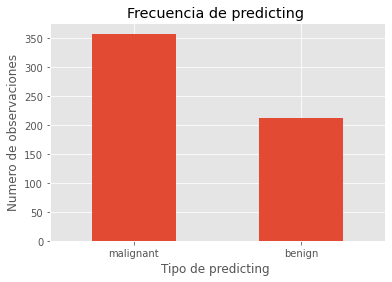

In [89]:
count_classes = pd.value_counts(data['M'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
LABELS=['malignant','benign']
plt.xticks(range(2), LABELS)
plt.title("Frecuencia de predicting ")
plt.xlabel("Tipo de predicting ")
plt.ylabel("Numero de observaciones");

In [90]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Estilo clásico para gráficos, puede a
plt.style.use('classic')






In [91]:
corr = data.corr()

In [92]:
corr.style.background_gradient (cmap )

NameError: ignored

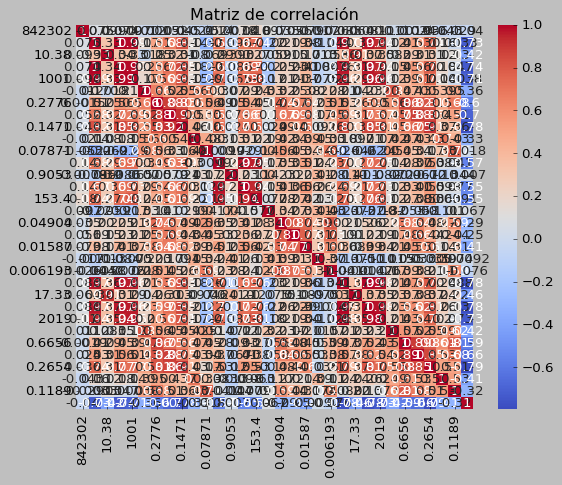

In [93]:
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.title('Matriz de correlación')
plt.show()

In [94]:
x = [1.1  , 2.1,2.1]
y = [1, 1  ,1.1]

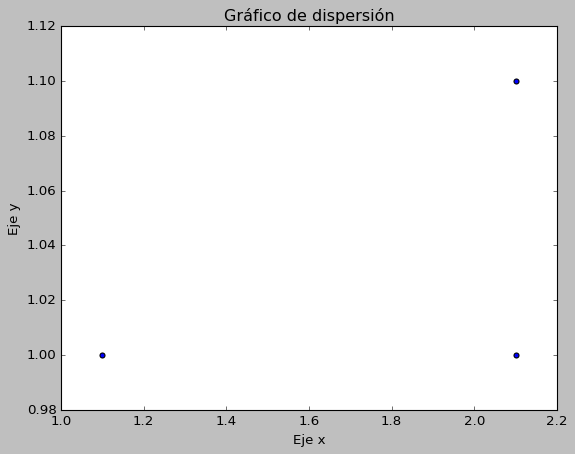

In [95]:
plt.scatter(x, y)
plt.title("Gráfico de dispersión")
plt.xlabel("Eje x")
plt.ylabel("Eje y")
plt.show()

In [96]:


import numpy as np
from PIL import Image

imagenes = []

for imagen in data["1.3"]:
  imagen_array = np.array(Image.open(imagen))
  imagenes.append(imagen_array)

KeyError: ignored

In [97]:
data

,842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,...,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189,diagnosis
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.17910,0.52490,0.5355,0.1741,0.3985,0.12440,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
564,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
565,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
566,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

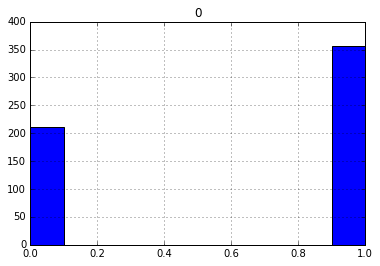

In [128]:
import matplotlib
data['diagnosis'].apply(pd.Series).hist()

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

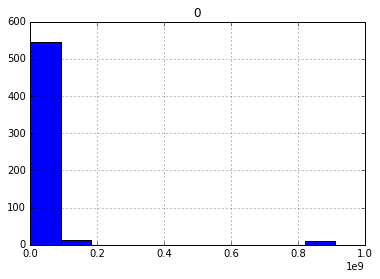

In [129]:
import matplotlib
data['842302'].apply(pd.Series).hist()

In [130]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 33 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   842302     568 non-null    int64  
 1   M          568 non-null    object 
 2   17.99      568 non-null    float64
 3   10.38      568 non-null    float64
 4   122.8      568 non-null    float64
 5   1001       568 non-null    float64
 6   0.1184     568 non-null    float64
 7   0.2776     568 non-null    float64
 8   0.3001     568 non-null    float64
 9   0.1471     568 non-null    float64
 10  0.2419     568 non-null    float64
 11  0.07871    568 non-null    float64
 12  1.095      568 non-null    float64
 13  0.9053     568 non-null    float64
 14  8.589      568 non-null    float64
 15  153.4      568 non-null    float64
 16  0.006399   568 non-null    float64
 17  0.04904    568 non-null    float64
 18  0.05373    568 non-null    float64
 19  0.01587    568 non-null    float64
 20  0.03003   

In [98]:
# Muestra la imagen
import matplotlib.pyplot as plt

plt.imshow(imagenes[0])
plt.show()

IndexError: ignored

hasta aqui

In [99]:
def plot_confusion_matrix(X, y, model):
    y_pred = model.predict(X)
    cm = confusion_matrix(y, y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=model.classes_)
    disp.plot()

    plt.show()



In [100]:
data

,842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,...,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189,diagnosis
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.17910,0.52490,0.5355,0.1741,0.3985,0.12440,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
564,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
565,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
566,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [101]:
# Preparamos dataset X, y
X = data.drop("842302", axis=1)
y = data["842302"]

In [102]:
y.value_counts()

842517     1
90250      1
901315     1
9013579    1
9013594    1
          ..
873885     1
873843     1
873701     1
873593     1
92751      1
Name: 842302, Length: 568, dtype: int64

<AxesSubplot:>

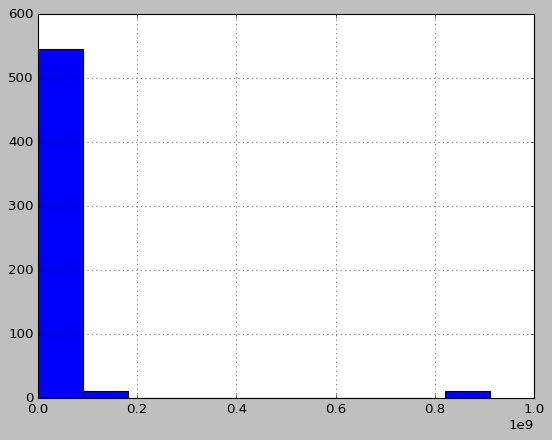

In [103]:
y.hist()

<AxesSubplot:>

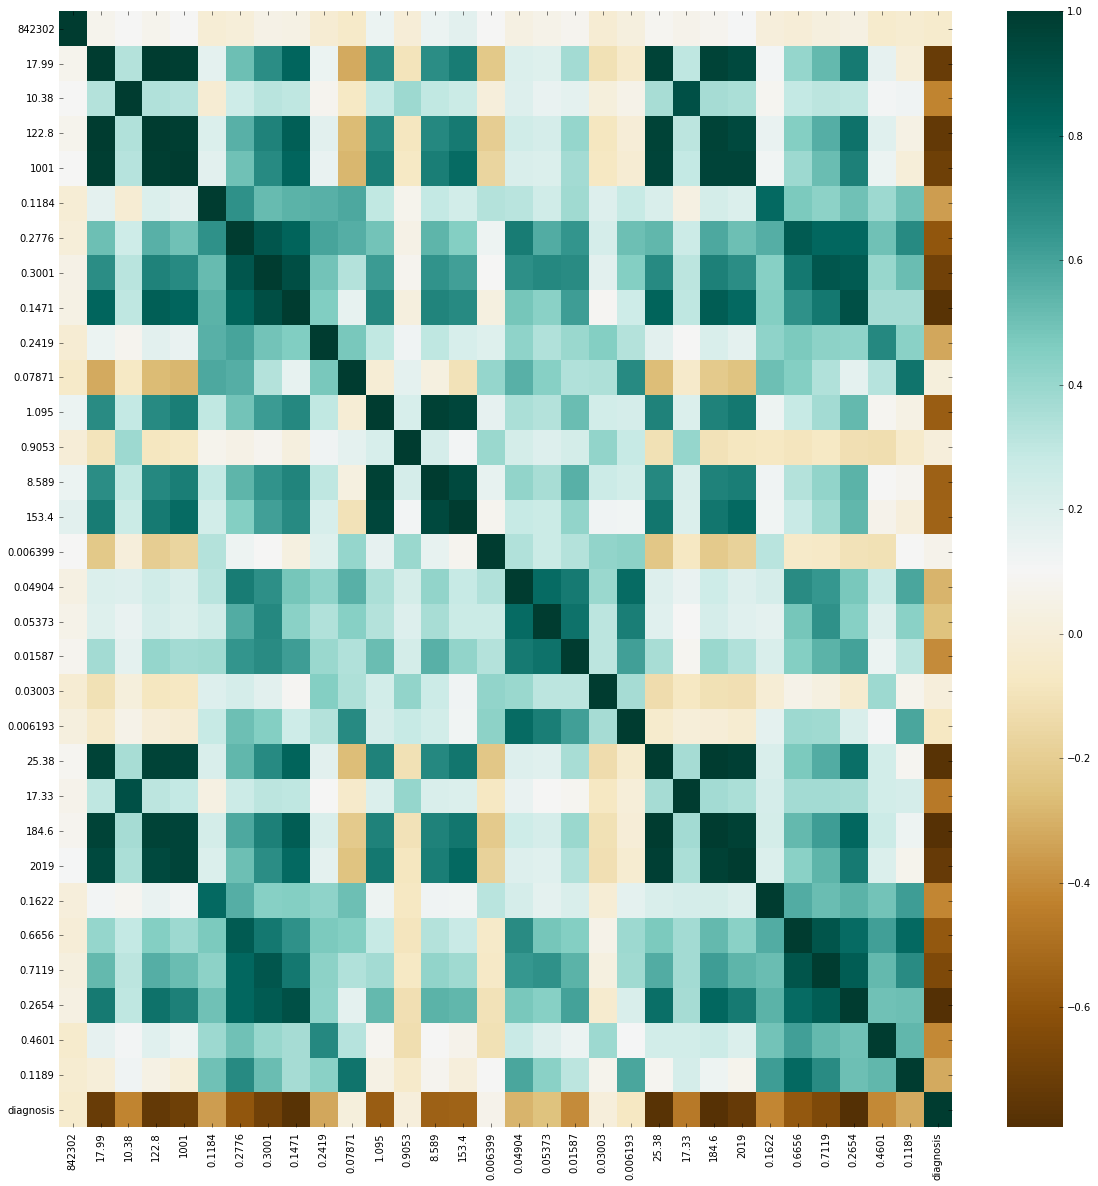

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


# Calculamos la matriz de correlacion
corr = data.corr()

# plot
plt.figure(figsize=(20, 20))
sns.heatmap(corr,
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap='BrBG')

In [131]:
from collections import Counter
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids(random_state=0)
X_resampled, y_resampled = cc.fit_resample(X, y)

ValueError: ignored

In [107]:
y_resampled.value_counts()

NameError: ignored

In [108]:
X_resampled.shape

NameError: ignored

In [109]:
y_resampled.shape

NameError: ignored

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, stratify=y_resampled, test_size=0.3, random_state=42)

NameError: ignored

In [111]:
# Sin bucle plantilla basica
def evaluate_model(X_train, y_train, X_test, y_test, model):
    print(f"Error training: {(1 - model.score(X_train, y_train)) * 100} %")
    print(f"Error test: {(1 - model.score(X_test, y_test)) * 100} %")
    print("")
    print("")
    print("")


    print("Training confusion matrix")
    plot_confusion_matrix(X_train, y_train, model)
    print("Test confusion matrix")
    plot_confusion_matrix(X_test, y_test, model)

In [112]:
# KNN

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

evaluate_model(X_train, y_train, X_test, y_test, model)

NameError: ignored

In [113]:
# Boosting
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.2,
    max_depth=1, random_state=0)

model = model.fit(X_train, y_train)

evaluate_model(X_train, y_train, X_test, y_test, model)

NameError: ignored

In [114]:
# Predict in original data:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

ValueError: ignored

In [115]:
evaluate_model(X_train, y_train, X_test, y_test, model)

NameError: ignored

In [116]:
import pickle



In [117]:
model

GradientBoostingClassifier(learning_rate=0.2, max_depth=1, random_state=0)

In [118]:
# Save Model Using Pickle
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression





# save the model to disk
filename = 'finalized_model.pkl'
pickle.dump(model, open(filename, 'wb'))
 


In [119]:
# some time later...

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))


In [120]:
loaded_model

GradientBoostingClassifier(learning_rate=0.2, max_depth=1, random_state=0)

In [121]:
result = loaded_model.score(X_test, y_test)
print(result)

NameError: ignored

In [122]:
import json

In [123]:
json.dumps(X_test.iloc[0].to_dict())

NameError: ignored

In [124]:
model.predict([X_test.iloc[0]])[0]

NameError: ignored

In [125]:
!pip list

Package                       Version
----------------------------- --------------------
absl-py                       1.4.0
aeppl                         0.0.33
aesara                        2.7.9
aiohttp                       3.8.4
aiosignal                     1.3.1
alabaster                     0.7.13
albumentations                1.2.1
altair                        4.2.2
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arviz                         0.12.1
astor                         0.8.1
astropy                       4.3.1
astunparse                    1.6.3
async-timeout                 4.0.2
atomicwrites                  1.4.1
attrs                         22.2.0
audioread                     3.0.0
autograd                      1.5
Babel                         2.12.1
backcall                      0.2.0
backports.zoneinfo            0.2.1
beautifulsoup4                4.6.3
bleach                        6.0.0
blis  

In [126]:
!pip list

Package                       Version
----------------------------- --------------------
absl-py                       1.4.0
aeppl                         0.0.33
aesara                        2.7.9
aiohttp                       3.8.4
aiosignal                     1.3.1
alabaster                     0.7.13
albumentations                1.2.1
altair                        4.2.2
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arviz                         0.12.1
astor                         0.8.1
astropy                       4.3.1
astunparse                    1.6.3
async-timeout                 4.0.2
atomicwrites                  1.4.1
attrs                         22.2.0
audioread                     3.0.0
autograd                      1.5
Babel                         2.12.1
backcall                      0.2.0
backports.zoneinfo            0.2.1
beautifulsoup4                4.6.3
bleach                        6.0.0
blis  

PRUEBA CON REDES NEURONALES

In [127]:
# Preparamos dataset X, y
X = data.drop("842302", axis=1)
y = data["842302"]


In [132]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 33 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   842302     568 non-null    int64  
 1   M          568 non-null    object 
 2   17.99      568 non-null    float64
 3   10.38      568 non-null    float64
 4   122.8      568 non-null    float64
 5   1001       568 non-null    float64
 6   0.1184     568 non-null    float64
 7   0.2776     568 non-null    float64
 8   0.3001     568 non-null    float64
 9   0.1471     568 non-null    float64
 10  0.2419     568 non-null    float64
 11  0.07871    568 non-null    float64
 12  1.095      568 non-null    float64
 13  0.9053     568 non-null    float64
 14  8.589      568 non-null    float64
 15  153.4      568 non-null    float64
 16  0.006399   568 non-null    float64
 17  0.04904    568 non-null    float64
 18  0.05373    568 non-null    float64
 19  0.01587    568 non-null    float64
 20  0.03003   

In [133]:
# ejercicio para reemplazar con data

import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense
 
# cargamos las 4 combinaciones de las compuertas XOR
training_data = np.array([[0,0],[0,1],[1,0],[1,1]], "float32")
 
# y estos son los resultados que se obtienen, en el mismo orden
target_data = np.array([[0],[1],[1],[0]], "float32")
 
model = Sequential()
model.add(Dense(16, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
 
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['binary_accuracy'])
 
model.fit(training_data, target_data, epochs=1000)
 
# evaluamos el modelo
scores = model.evaluate(training_data, target_data)
 
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print (model.predict(training_data).round())

Epoch 1/1000
1/1 [==============================] - 1s 910ms/step - loss: 0.2762 - binary_accuracy: 0.5000
Epoch 2/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.2757 - binary_accuracy: 0.5000
Epoch 3/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.2753 - binary_accuracy: 0.5000
Epoch 4/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.2749 - binary_accuracy: 0.5000
Epoch 5/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.2745 - binary_accuracy: 0.5000
Epoch 6/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.2741 - binary_accuracy: 0.5000
Epoch 7/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.2736 - binary_accuracy: 0.5000
Epoch 8/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.2732 - binary_accuracy: 0.5000
Epoch 9/1000
1/1 [==============================] - 0s 11ms/step - loss: 0.2728 - binary_accuracy: 0.5000
Epoch 10/1000
1/1 [==========================